In [25]:
import numpy as np
import numpy.linalg as nplin
import scipy.linalg as cplin
import scipy.optimize as opt
#Load data 
problem=2;
A=np.load("P"+str(problem)+"A.npy");
b=np.load("P"+str(problem)+"b.npy");
c=np.load("P"+str(problem)+"c.npy");
#Set parameters
mu=100; gamma=0.9; eps_mu=1e-4; 
#Set initial guess x_0/s_0
m1=20; m2=30; m3=10; M=m1+m2+m3;
x_0=np.zeros([M*(M+1),1]);
x_0[:m1*M]=1/m1/M
x_0[m1*M:(m1+m2)*M]=1/m2/M
x_0[(m1+m2)*M:M*M]=1/m3/M
x_0[-M:]=1/M;
AT=np.transpose(A)
x=np.array(x_0)
while (mu>eps_mu):
    X=np.diag(x.flatten());
    AX=np.matmul(A,X)
    X2=np.matmul(X,X)
    AX2=np.matmul(AX,X)
    AX2AT=np.matmul(AX2,np.transpose(A))
    dy=nplin.solve(AX2AT,-mu*np.matmul(A,x)+np.matmul(AX2,c))
    dx=np.array(x+(1/mu)*np.matmul(X2,np.matmul(AT,dy)-c))
    def obj(h):
        out=np.matmul(np.transpose(c),x+h*dx)-mu*np.sum(np.log(x+h*dx))
        return out[0][0]
    h=opt.minimize(obj,1)
    x=np.array(x+h.x*dx)
    print(np.matmul(np.transpose(c),x))
    mu=gamma*mu

[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.0000000

In [28]:
qs=np.load("P2q.npy",allow_pickle=True)
q1=qs[0]
q2=qs[1]
q3=qs[2]

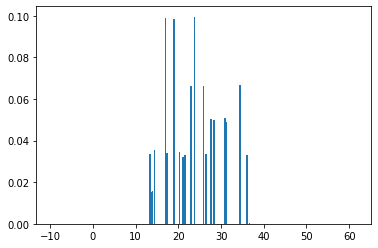

In [35]:
import matplotlib.pyplot as plt

plt.bar(np.concatenate([q1,q2,q3]),x[-M:,0],width=0.4)
plt.savefig("P2_central_path")